# 第2回勉強会資料


## 本日のコンテンツ

- 環境構築
  - pandasのインストール
  - numpyのインストール
  - matplotlinのインストール
  - scikit-learnのインストール
- 統計学入門
  - 統計学とは何か
  - 統計学の目的
  - データとその種類
  - 1次元データの扱い
    - 代表値
      - 平均値
      - 中央値
      - 最頻値
    - 度数分布表
      - ヒストグラム
        - ヒストグラムの形とデータの特徴
      - 累積度数分布表
    

## 代表値
平均値や中央値，最頻値といった，そのデータを要約（代表）するような指標のことを代表値と呼ぶ．
各代表値の定義は，得られたデータを$x_1,x_2,...,x_i,...,x_n$とすると，次のように表される．

### 平均値
全てのデータを足して，要素数で割った値．
$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

### 中央値
得られたデータを小さい順に並べ替えた時，ちょうど真ん中にある値．
得られたデータを小さい順に並べ替えた数列を，$x_{1}',x_{2}',...,x_{i}',...,x_{n}'$とするとき，中央値medは，

$$med = \begin{cases}
    x_{\frac{n+1}{2}} & (nが奇数) \\
    \frac{1}{2}(x_{\frac{n}{2}}' + x_{\frac{2}{n}+1}') & (nが偶数)
  \end{cases}$$

と表される．

### 最頻値
得られたデータにおいて最も多く観測された値

## 演習問題
a = [1,1,2,3,5,6,7,7,8,8,8,9,10,12,12,19,20]とする.  
中央値および最頻値を求める関数，medeian，modeを記述せよ．

In [14]:
#　答え
def median(a:list) -> float:
    a.sort()
    n = len(a)

    if n%2 == 0:
        return (1/2)*(a[int(n/2)]+a[int(n/2)+1])
    else:
        return a[int((n+1)/2)]

def mode(a:list) -> int:
    count = [0 for i in range(max(a)+1)]
    for i in a:
        count[i] += 1
    return count.index(max(count)) + 1

a = [1,1,2,3,5,6,7,7,8,8,8,9,10,12,12,19,20]

print(median((a)))
print(mode(a))


8
9


## 度数分布表とヒストグラム

### 度数分布表
度数分布表とは，量的データを値の小さい順にいくつかのクラスに分け，各クラスに属する要素の数を数え上げた表である.  
例えば，成人男性が20人おり，次のような身長データが得られた.  
168,169,191,184,185,187,189,188,181,183,175,174,173,177,178,179,177,176  
5cmごとに区間を作ると，度数分布表は次のように書ける  

|            |   Height |
|:-----------|---------:|
| 160 ~ 165 |        0 |
| 165 ~ 170 |        2 |
| 170 ~ 175 |        3 |
| 175 ~ 180 |        7 |
| 180 ~ 185 |        3 |
| 185 ~ 190 |        4 |
| 190 ~ 195 |        1 |

度数分布表はデータの性質を掴むために重要な要素である.  
例えば,データが集中している区間（山）はあるか，いくつあるか，左右のどちらに偏っているか，裾は長いか，など．  

## 演習問題（難）
ヒストグラムを作る区間の個数$k$とデータ$x$を与えられたとき，度数分布表を算出するコードを記述せよ.


In [67]:
import random
k = 5
x = [random.randint(0,50) for i in range(50)]

# 解答欄

x.sort()
Min = min(x)
Max = max(x)
ans = {}

# 外側のループで区間を作る
for i in range(Min,Max+1,k):
    # 各区間の下限値
    lower = i
    # 各区間の上限値
    upper = i + k - 1
    label = str(lower) + "~" + str(upper)
    ans[label] = 0
    # 内側のループで各データが区間の中にあるかどうかを確かめる
    for j in x:
        if lower <= j <= upper:
            # print(j,label)
            ans[label] += 1

for i in ans:
    print(i,ans[i])

0~4 3
5~9 9
10~14 6
15~19 4
20~24 4
25~29 6
30~34 7
35~39 5
40~44 3
45~49 1
50~54 2


### ヒストグラム
ヒストグラムとは，この度数分布表を可視化したものである.  
同じデータをpythonで可視化してみると，下記のようになる．（中身は理解しなくてよい）

matplotlibで日本語を使えるようにするために，下記のモジュールを使用する

`python3 -m pip install japanize-matplotlib`

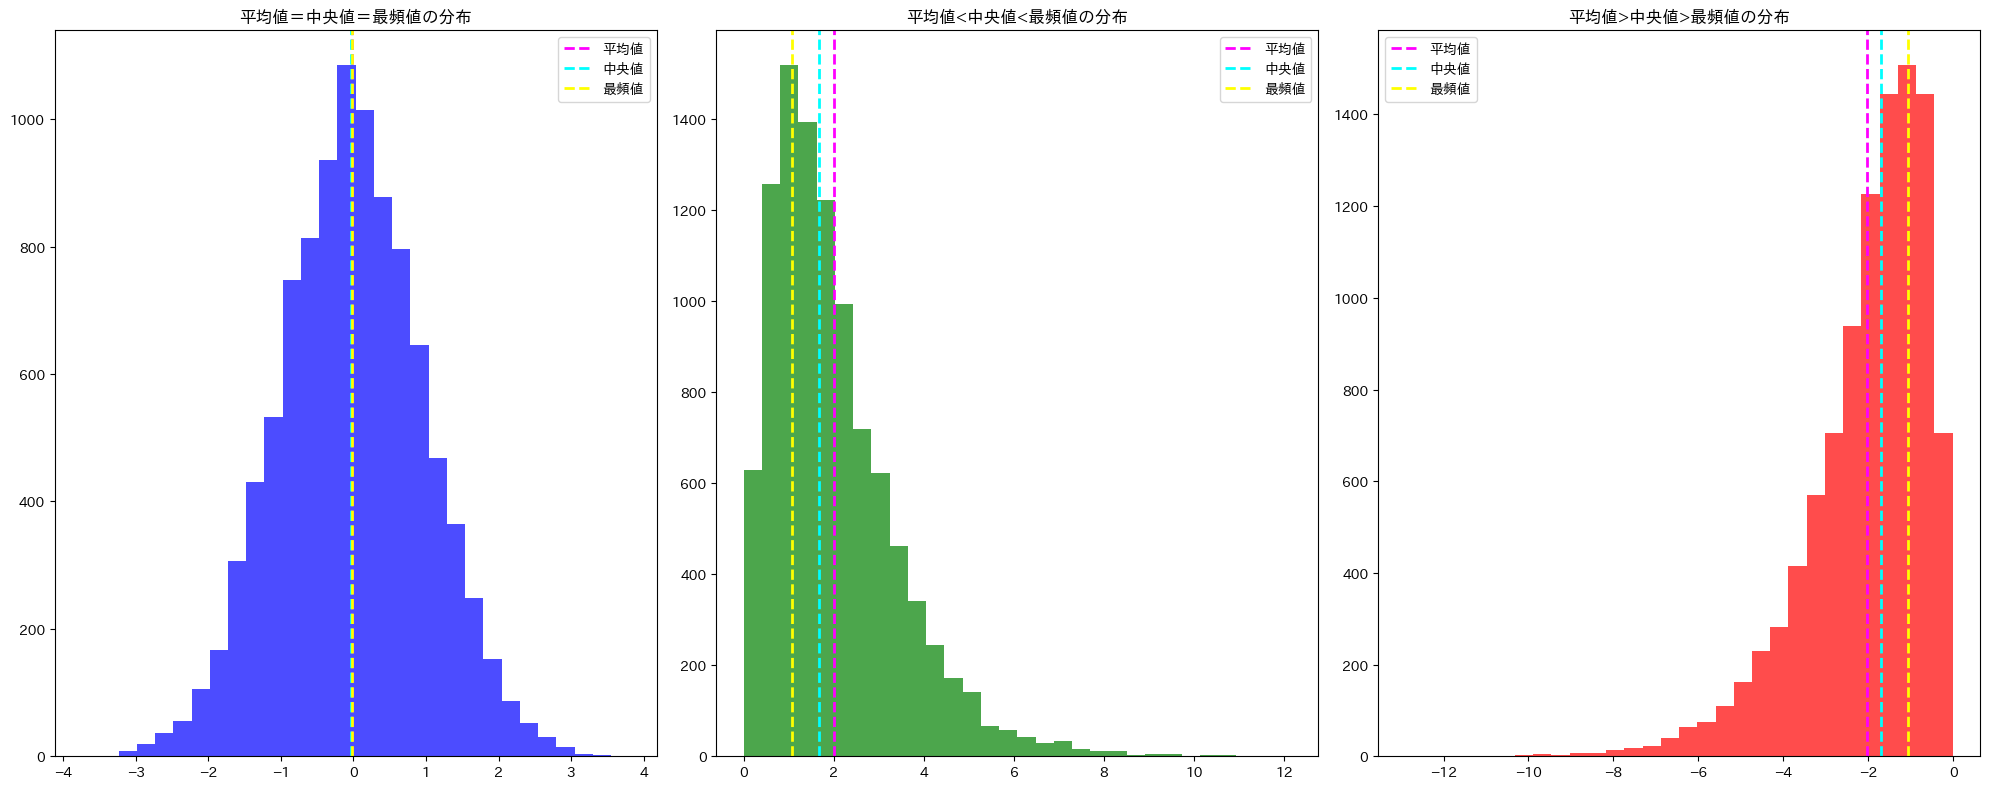

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import mode

# 乱数のシードを固定する
np.random.seed(0)

# mean = median = mode となるような分布（正規分布）
normal_data = np.random.normal(loc=0, scale=1, size=10000)

# mean < median < mode となるような分布（右側に偏った分布）
right_skewed_data = np.random.gamma(shape=2, scale=1, size=10000)

# mean < median < mode となるような分布（左側に偏った分布）
left_skewed_data = -np.random.gamma(shape=2, scale=1, size=10000)

def find_continuous_mode(data):
    kde = gaussian_kde(data)
    linspace_data = np.linspace(min(data), max(data), 1000)
    mode_index = np.argmax(kde(linspace_data))
    return linspace_data[mode_index]

# 平均値，中央値，最頻値のラインを引くための関数
def annotate_stats(ax, data, color):
    mean = np.mean(data)
    median = np.median(data)
    mode_val = find_continuous_mode(data)

    ax.axvline(mean, color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(median, color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(mode_val, color='yellow', linestyle='dashed', linewidth=2)

    ax.legend(['平均値', '中央値', '最頻値'])

# Re-plot histograms with annotations
plt.figure(figsize=(20, 8))

# Normal distribution
ax1 = plt.subplot(1, 3, 1)
plt.hist(normal_data, bins=30, color='blue', alpha=0.7)
annotate_stats(ax1, normal_data, 'blue')
plt.title("平均値＝中央値＝最頻値の分布")

# Right-skewed distribution
ax2 = plt.subplot(1, 3, 2)
plt.hist(right_skewed_data, bins=30, color='green', alpha=0.7)
annotate_stats(ax2, right_skewed_data, 'green')
plt.title("平均値<中央値<最頻値の分布")

# Left-skewed distribution
ax3 = plt.subplot(1, 3, 3)
plt.hist(left_skewed_data, bins=30, color='red', alpha=0.7)
annotate_stats(ax3, left_skewed_data, 'red')
plt.title("平均値>中央値>最頻値の分布")

plt.tight_layout()
plt.show()


## 演習問題

それぞれの分布の特徴を考えてみよう.  
具体的にどんなデータが上のヒストグラムの形を取りそうか考えてみよう.

#### 解答欄  

- 青いヒストグラムは中央値，平均値，最頻値が一致している
    - このような分布は正規分布と呼ばれ，テストの成績，マクドナルドで購入するポテトの重量，成人の身長や体重などが当てはまる.
- 緑のヒストグラムは左にデータが偏っている=小さい値のデータが多く，最頻値>中央値>平均値となっている．右に裾が長いとも言う．裾の部分は，「ロングテール」とも呼ばれる．
    - 中央値<平均値は，大半のデータは平均より値が低いにもかかわらず，一部の極端に値が大きいデータが平均を押し上げていることを意味する．人々の収入，土地価格などが該当する
- 赤のヒストグラムは右にデータが偏っている=大きい値のデータが多く，最頻値<中央値<平均値となっている．左に裾が長いとも言う．
    - 中央値>平均値は，大半のデータは平均より高いにもかかわらず，一部の値の極端に小さいデータが平均を押し下げていることを意味する．例えば，引退年齢，車が廃車になるまでの年数，成人に小学生用のテストを受けさせた際のテスト結果などが該当する

### 累積度数分布



### 参考文献
- 松原望, 縄田和満, 中井検裕, & 統計学入門. (1991). 東京大学教養学部統計学教室 (編)